In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
 


In [5]:
df=pd.read_csv('Survey-1.csv')

In [6]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [8]:
df.shape

(62, 14)

In [9]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [13]:
df.dtypes

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

In [ ]:
#Q1

In [301]:
pd.crosstab(df['Gender'],df['Major'],margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [302]:
pd.crosstab(df['Gender'],df['Grad Intention'],margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [303]:
pd.crosstab(df['Gender'],df['Employment'],margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [304]:
pd.crosstab(df['Gender'],df['Computer'],margins = True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [22]:
#Q2

In [25]:
df.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [306]:
P_Male= 33/62

In [307]:
print('Probability of selecting a Male student is', P_Male)


Probability of selecting a Male student is 0.532258064516129


In [308]:
P_Female= 29/62

In [309]:
print('Probability of selecting a Female student is', P_Female)

Probability of selecting a Female student is 0.46774193548387094


In [333]:
#Q3:
pd.crosstab(df['Gender'],df['Major'],margins = True,)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [336]:
Male_majors=df.loc[df['Gender']=='Male',:]


In [340]:
pd.crosstab(Male_majors['Gender'],df['Major'],normalize=True,margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448,1.0
All,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448,1.0


In [342]:
Female_majors=df.loc[df['Gender']=='Female',:]
pd.crosstab(Female_majors['Gender'],df['Major'],normalize=True,margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,All
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,1.0
All,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,1.0


In [60]:
pd.crosstab(df['Gender'],df['Grad Intention'],margins = True,normalize=False)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [61]:
Male2=17/62

In [64]:
print('The probability that a randomly chosen student is a male and intends to graduate is', Male2)

The probability that a randomly chosen student is a male and intends to graduate is 0.27419354838709675


In [65]:
pd.crosstab(df['Gender'],df['Computer'],margins = True,normalize=False)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [66]:
Female2=4/62

In [67]:
print('The probability that a randomly selected student is a female and does NOT have a laptop.', Female2)

The probability that a randomly selected student is a female and does NOT have a laptop. 0.06451612903225806


In [68]:
#Q5:

In [70]:
pd.crosstab(df['Gender'],df['Employment'],margins = True,normalize=False)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [73]:
#From the table we select all the man(i.e-29) plus all the females that have a full time employment.
A=(29 + 3)/62

In [74]:
print('The probability that a randomly chosen student is either a male or has a full-time employment', A)

The probability that a randomly chosen student is either a male or has a full-time employment 0.5161290322580645


In [444]:
pd.crosstab(df['Gender'],df['Major'],margins = True,normalize=False)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [ ]:
#From the table we select 4 as the number of females majoring in International Business.

In [445]:
B=8/33

In [446]:
print('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is', B)

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 0.24242424242424243


In [80]:
#Q6:

In [413]:
C=pd.crosstab(df['Gender'],df['Grad Intention'],margins = False,normalize=False)
C.drop('Undecided',axis=1)
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,Texting
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50,50


In [419]:
AD=pd.crosstab(df['Gender'],df['Employment'],margins = True,normalize=False)
AD

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [418]:
AS=pd.crosstab(df['Gender'],df['Class'],margins = True,normalize=False)
AS

Class,Junior,Senior,Sophomore,All
Gender,,,,
Female,14,17,2,33
Male,11,14,4,29
All,25,31,6,62


In [426]:
AA=pd.crosstab(df['Gender'],df['Satisfaction'],margins = True,normalize=False)
AA

Satisfaction,1,2,3,4,5,6,All
Gender,,,,,,,
Female,3,2,10,12,5,1,33
Male,2,0,5,14,5,3,29
All,5,2,15,26,10,4,62


In [427]:
AA.skew(axis=1)

Gender
Female    1.963321
Male      1.788189
All       1.924071
dtype: float64

In [94]:
#Q7:

In [ ]:
#associate a variable of selcting a student whose GPA is lesser than 3 

In [148]:
df.GPA.value_counts(ascending=False)

3.1    7
3.4    7
3.0    7
3.2    6
3.5    6
2.5    6
3.3    5
2.9    4
3.6    3
2.8    3
3.7    2
2.6    2
2.4    1
3.9    1
3.8    1
2.3    1
Name: GPA, dtype: int64

In [170]:
F=pd.crosstab(df['Gender'],df['GPA'],margins = False,normalize=False)
F

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [221]:
AA=df.loc[df.GPA<3.0,:]
AA.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30


In [222]:
print('To find the number of student whose GPA is greater than 3.0 we can now just count the number of rows in the list as each row represent an indivitual person.')
AA.shape

To find the number of student whose GPA is greater than 3.0 we can now just count the number of rows in the list as each row represent an indivitual person.


(17, 14)

In [223]:
AB=17/62
print(' If a student is chosen randomly, the probability that his/her GPA is less than 3 is', AB )

 If a student is chosen randomly, the probability that his/her GPA is less than 3 is 0.27419354838709675


In [224]:
AC=df.loc[df.Salary>50,:]
AD=AC.loc[AC['Gender']=='Male',:]
AD

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
21,22,Male,18,Sophomore,Accounting,Undecided,3.0,Unemployed,60.0,1,4,600,Laptop,500
25,26,Male,24,Senior,Management,Yes,3.3,Full-Time,60.0,0,1,300,Laptop,40
26,27,Male,20,Junior,Economics/Finance,Yes,3.1,Full-Time,65.0,1,5,375,Laptop,300
28,29,Male,22,Senior,Retailing/Marketing,Yes,3.3,Part-Time,55.0,1,6,1100,Laptop,60
30,31,Male,20,Junior,Accounting,Undecided,3.4,Part-Time,55.0,2,3,500,Laptop,750
40,41,Male,22,Junior,Accounting,Yes,3.2,Full-Time,60.0,1,4,680,Desktop,200
47,48,Male,19,Sophomore,Undecided,Undecided,2.5,Part-Time,80.0,2,4,500,Laptop,150


In [210]:
AD.shape

(10, 14)

In [219]:
print('To find the number of male student whose salary is greater than 50 we can now just count the number of rows in the list as each row represent an indivitual person')


To find the number of male student whose salary is greater than 50 we can now just count the number of rows in the list as each row represent an indivitual person


In [220]:
AE=10/29
print(' If a male student is chosen randomly, the probability that his salary is greater than 50 is', AE )


 If a male student is chosen randomly, the probability that his salary is greater than 50 is 0.3448275862068966


In [226]:
AC=df.loc[df.Salary>50,:]
AF=AC.loc[AC['Gender']=='Female',:]
AF.shape

(13, 14)

In [227]:
print('To find the number of Female student whose salary is greater than 50 we can now just count the number of rows in the list as each row represent an indivitual person')


To find the number of Female student whose salary is greater than 50 we can now just count the number of rows in the list as each row represent an indivitual person


In [229]:
AG=13/33
print(' If a Female student is chosen randomly, the probability that her salary is greater than 50 is', AG )

 If a Female student is chosen randomly, the probability that her salary is greater than 50 is 0.3939393939393939


In [343]:
#2.8.1 

In [456]:
Mean=df.mean()
pd.DataFrame(Mean)

,0
ID,31.500000
Age,21.129032
GPA,3.129032
Salary,48.548387
Social Networking,1.516129
Satisfaction,3.741935
Spending,482.016129
Text Messages,246.209677
Texting,246.209677


In [ ]:
df.median()

(array([ 1.,  5.,  2.,  2., 13.,  5., 11.,  2.,  8.,  8.,  1.,  0.,  1.,
         0.,  3.]),
 array([25.        , 28.66666667, 32.33333333, 36.        , 39.66666667,
        43.33333333, 47.        , 50.66666667, 54.33333333, 58.        ,
        61.66666667, 65.33333333, 69.        , 72.66666667, 76.33333333,
        80.        ]),
 <a list of 15 Patch objects>)

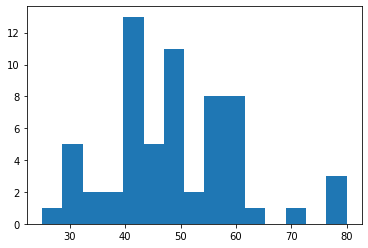

In [241]:
plt.hist(df['Salary'],bins=15)

(array([ 1.,  7., 11.,  7., 18.,  9.,  5.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  1.]),
 array([ 100.        ,  186.66666667,  273.33333333,  360.        ,
         446.66666667,  533.33333333,  620.        ,  706.66666667,
         793.33333333,  880.        ,  966.66666667, 1053.33333333,
        1140.        , 1226.66666667, 1313.33333333, 1400.        ]),
 <a list of 15 Patch objects>)

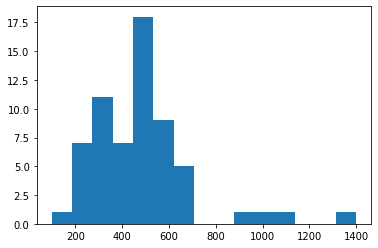

In [240]:
plt.hist(df['Spending'], bins=15)

(array([12., 12.,  6.,  6.,  2., 12.,  2.,  0.,  3.,  0.,  2.,  2.,  1.,
         1.,  1.]),
 array([  0.,  60., 120., 180., 240., 300., 360., 420., 480., 540., 600.,
        660., 720., 780., 840., 900.]),
 <a list of 15 Patch objects>)

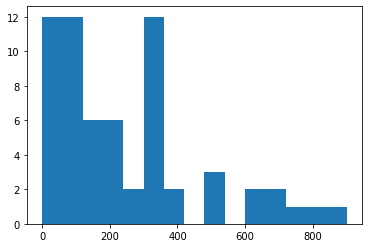

In [242]:
plt.hist(df['Text Messages'],bins=15)

(array([2., 6., 2., 0., 3., 4., 7., 7., 6., 5., 7., 6., 3., 2., 2.]),
 array([2.3       , 2.40666667, 2.51333333, 2.62      , 2.72666667,
        2.83333333, 2.94      , 3.04666667, 3.15333333, 3.26      ,
        3.36666667, 3.47333333, 3.58      , 3.68666667, 3.79333333,
        3.9       ]),
 <a list of 15 Patch objects>)

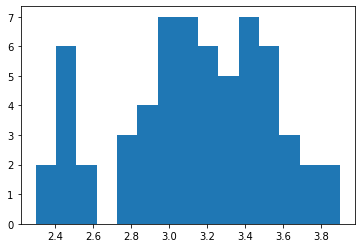

In [243]:
plt.hist(df['GPA'],bins=15)

In [356]:
# The skew threshold is usually taken as 2*SQRT(6/COUNT) and can b either its positive or negative values
skew_threshold=0.62217

In [407]:
df['Texting'] = df['Text Messages']

In [443]:
stats.shapiro(df.Salary)


(0.9565856456756592, 0.028000956401228905)

In [380]:
stats.shapiro(df.GPA)

(0.9685361981391907, 0.11204058676958084)

In [381]:
stats.shapiro(df.Spending)

(0.8777452111244202, 1.6854661225806922e-05)

In [405]:
stats.shapiro(df.Texting)


(0.8594191074371338, 4.324040673964191e-06)

In [410]:
print('The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed and vice versa') 

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed and vice versa
